<a href="https://colab.research.google.com/github/ayushbabuta/Black-Friday-sale-analysis/blob/main/Black%20Friday%20sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
from google.colab import drive


In [139]:
url="https://raw.githubusercontent.com/ayushbabuta/Black-Friday-sale-analysis/main/BlackFriday%20(1).csv"
df=pd.read_csv(url)

In [140]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [141]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,166986


In [142]:
df[df["Product_Category_2"].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
...,...,...,...,...,...,...,...,...,...,...,...,...
537563,1004736,P00154642,M,18-25,20,A,1,1,8,NaN,NaN,6074
537565,1004736,P00051142,M,18-25,20,A,1,1,8,NaN,NaN,7934
537566,1004736,P00048742,M,18-25,20,A,1,1,5,NaN,NaN,5350
537568,1004736,P00250642,M,18-25,20,A,1,1,11,NaN,NaN,5930


In [143]:
df.corr(numeric_only=True)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


In [144]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [145]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,23961.000000


Columan analysis

In [146]:
for i in df.columns:
    print(f"Unique values in {i} are:{df[i].nunique()}\n {df[i].unique()}\n")

Unique values in User_ID are:5891
 [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique values in Product_ID are:3623
 ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']

Unique values in Gender are:2
 ['F' 'M']

Unique values in Age are:7
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique values in Occupation are:21
 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique values in City_Category are:3
 ['A' 'C' 'B']

Unique values in Stay_In_Current_City_Years are:5
 ['2' '4+' '3' '1' '0']

Unique values in Marital_Status are:2
 [0 1]

Unique values in Product_Category_1 are:18
 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]

Unique values in Purchase are:17959
 [ 8370 15200  1422 ... 14539 11120 18426]



In [147]:
"""data_gen=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]) ,len(df[df["Gender"]=="F"])]},index=["Male","Female"])
data_gen.plot.pie(subplots=True,autopct="%.1f")"""

'data_gen=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]) ,len(df[df["Gender"]=="F"])]},index=["Male","Female"])\ndata_gen.plot.pie(subplots=True,autopct="%.1f")'

# Gender Analysis

<Axes: title={'center': 'Gender Distribution'}>

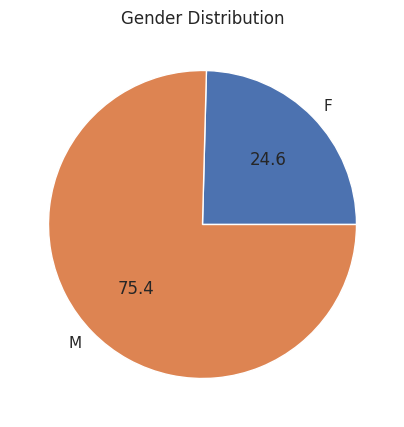

In [148]:
df.groupby(by="Gender").size().plot.pie(autopct="%.1f"
                                       ,title="Gender Distribution",
                                       figsize=(5,5))

In [149]:
df.groupby(by="Gender").size()


,0
Gender,
F,132197
M,405380


<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

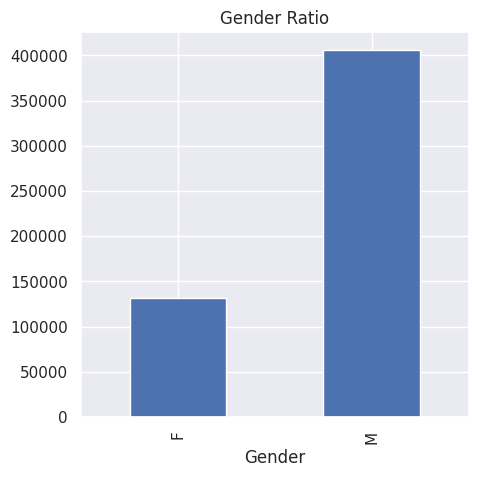

In [150]:
df.groupby(by="Gender").size().plot(kind="bar",title="Gender Ratio")

<Axes: xlabel='Gender'>

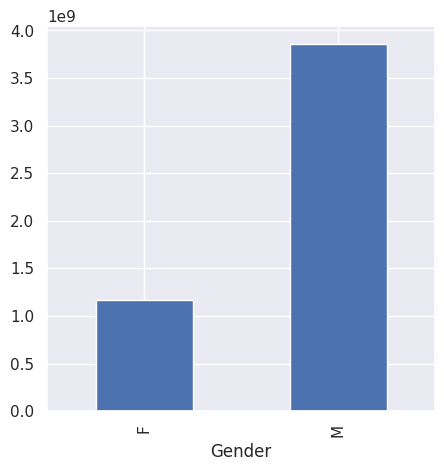

In [83]:
#Amount spend by male and female
df.groupby(by="Gender").sum()["Purchase"].plot(kind="bar")

<Axes: ylabel='Purchase'>

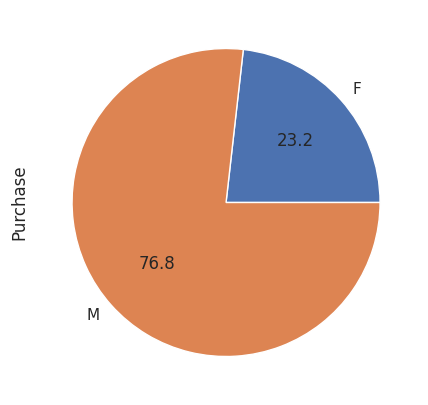

In [151]:
##Amount spend by male and female(RAtio)
df.groupby(by="Gender").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

<Axes: ylabel='Purchase'>

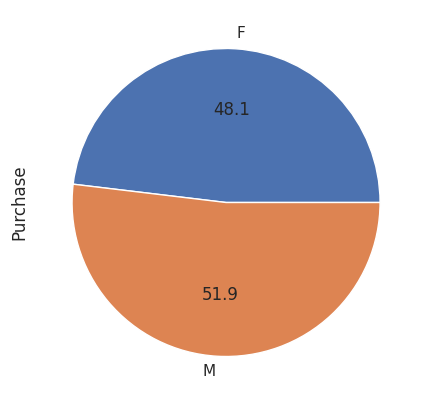

In [152]:
#What is the avg price spend by male and female
df.groupby(by="Gender").mean(numeric_only=True)["Purchase"].plot(kind="pie",autopct="%.1f")

<Axes: xlabel='Gender'>

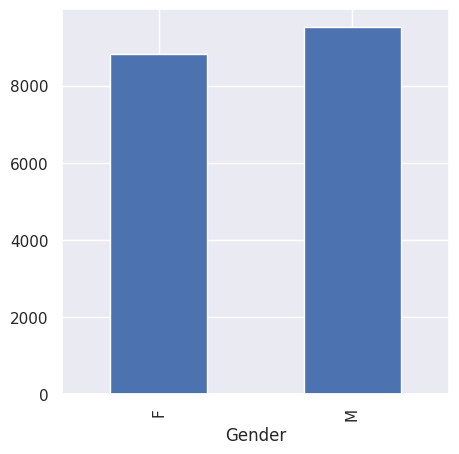

In [153]:
df.groupby("Gender").mean(numeric_only=True)["Purchase"].plot(kind="bar")

# Age And Maritial status

<Axes: title={'center': 'Amount Distribution by age'}, xlabel='Age'>

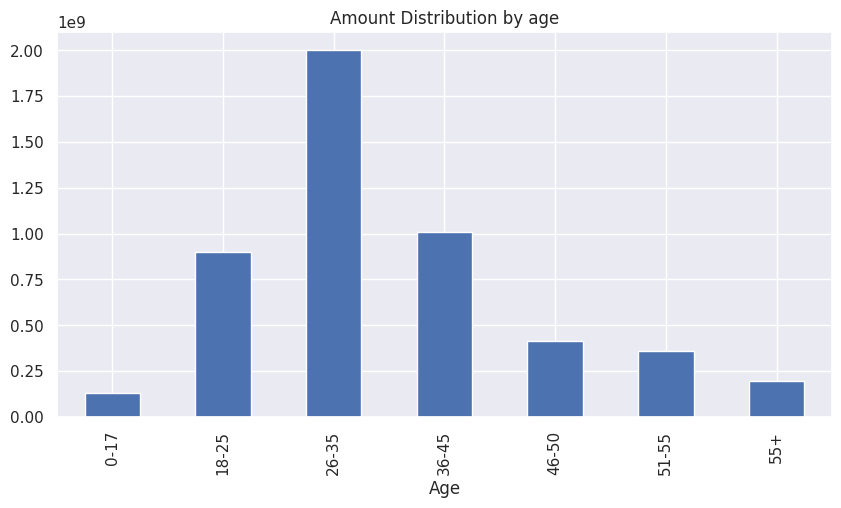

In [154]:
df.groupby(by="Age").sum()["Purchase"].plot.bar(title="Amount Distribution by age",figsize=(10,5))

<Axes: title={'center': 'Amount Distribution by age'}, ylabel='Purchase'>

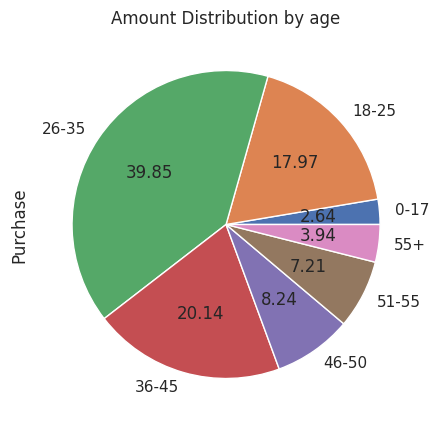

In [205]:
df.groupby(by="Age").sum()["Purchase"].plot(title="Amount Distribution by age",figsize=(10,5),kind="pie",autopct="%.2f")

In [155]:
for i in df["Age"].unique():
  print(i,":",len(df[df["Age"]==i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


<Axes: xlabel='Age'>

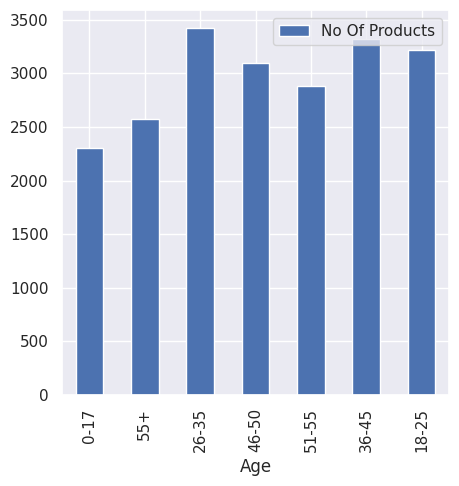

In [156]:
l=[]
for i in df["Age"].unique():
   l.append((i,df[df["Age"]==i]["Product_ID"].nunique()))
pd.DataFrame(l,columns=["Age","No Of Products"]).plot(kind="bar",x="Age",y="No Of Products")

In [157]:
#df.groupby(by="Age").sum()["Purchase"].plot(kind="bar")

<Axes: ylabel='Purchase'>

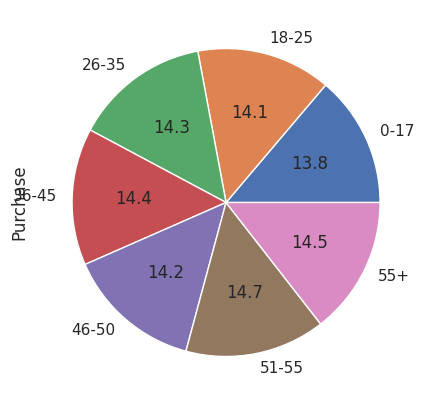

In [158]:
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind = 'pie', autopct = '%0.1f')


<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

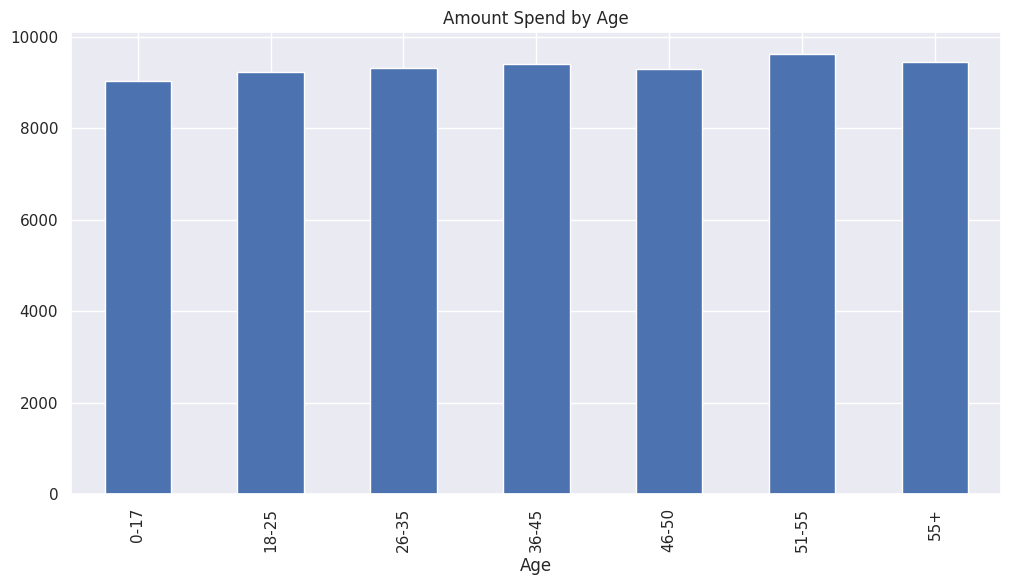

In [159]:
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')


<Axes: >

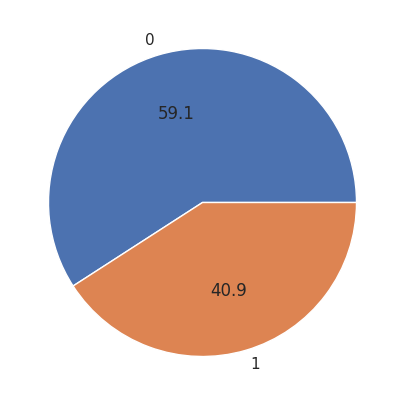

In [160]:
df.groupby(by="Marital_Status").size().plot(kind="pie",autopct="%.1f")

# Bivariate Analysis

In [161]:
df.sample(9)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
145009,1004352,P00008842,M,18-25,4,B,0,0,1,4505
407655,1002785,P00315442,M,55+,13,C,1,1,1,11981
307149,1005339,P00127842,M,18-25,17,C,1,0,1,8024
212521,1002844,P00248942,M,26-35,20,C,3,1,1,19137
327995,1002507,P00212542,M,26-35,4,A,0,1,8,3932
67889,1004386,P00255542,M,26-35,5,B,1,0,5,6915
37651,1005795,P00089342,M,26-35,1,A,1,1,8,9795
182941,1004227,P00217542,M,26-35,19,A,0,0,1,4466
65739,1004054,P00233042,M,36-45,3,B,1,0,1,11513


<Axes: xlabel='Age', ylabel='count'>

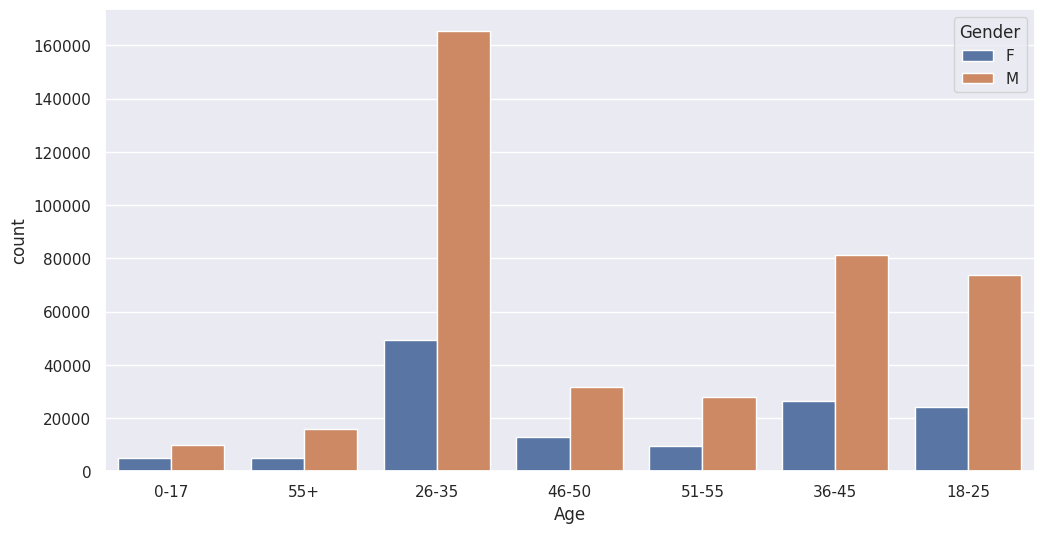

In [162]:
sns.set({"figure.figsize":(12,6)})
sns.countplot(data=df,hue="Gender",x="Age")

<Axes: xlabel='Gender', ylabel='count'>

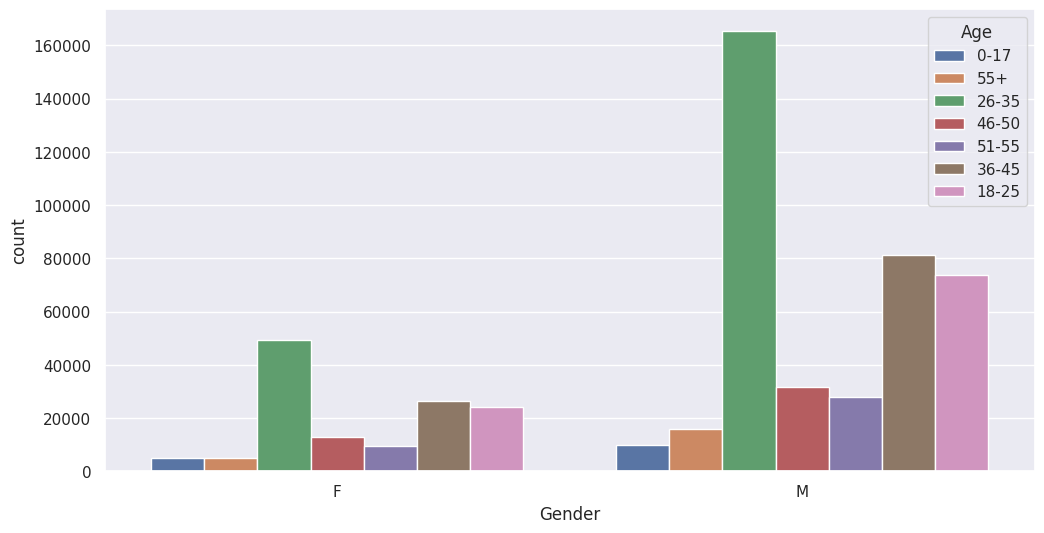

In [163]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(df,x="Gender",hue="Age")

<Axes: xlabel='Gender', ylabel='count'>

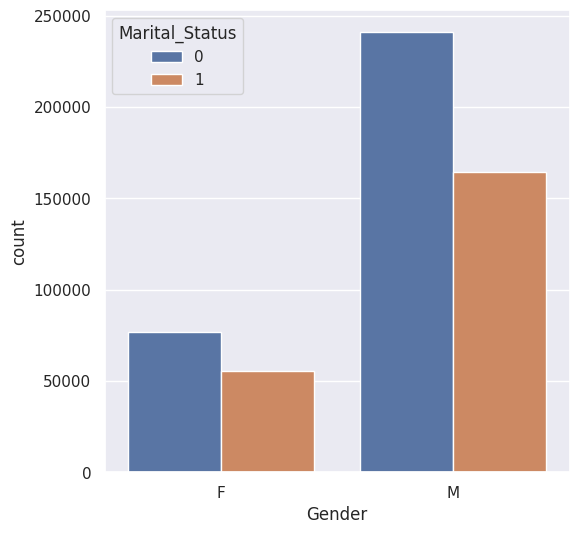

In [164]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x ="Gender", hue ='Marital_Status', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

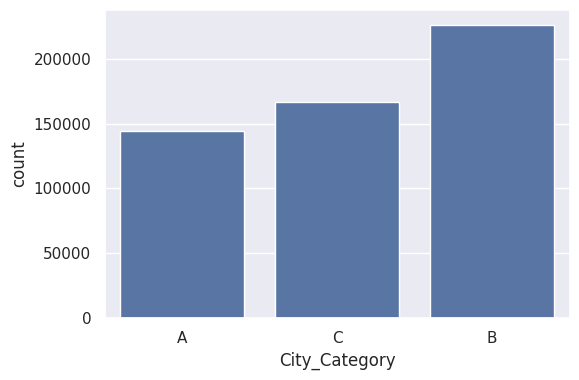

In [165]:
sns.set({"figure.figsize":(6,4)})
sns.countplot(x=df["City_Category"])

<Axes: >

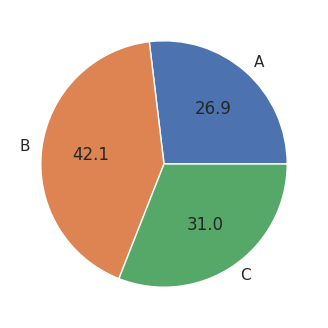

In [166]:
df.groupby(by="City_Category").size().plot(kind="pie",autopct="%.1f")

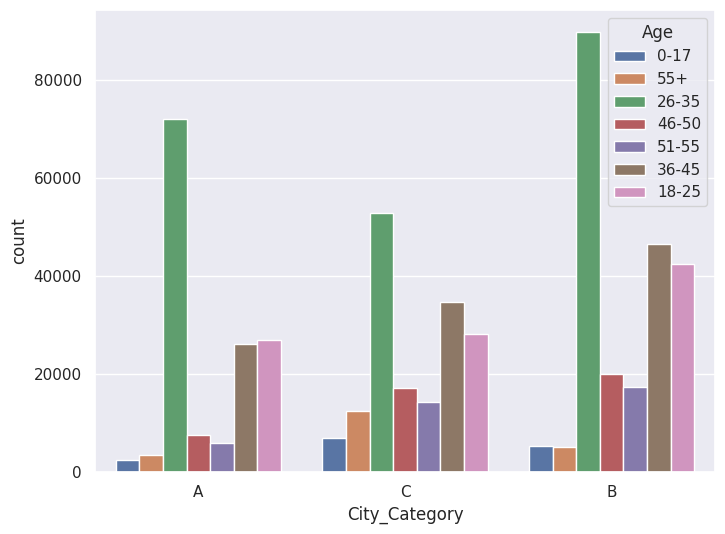

In [207]:
sns.countplot(df,x="City_Category",hue="Age")
sns.set({"figure.figsize":(9,7)})

<Axes: xlabel='Marital_Status', ylabel='count'>

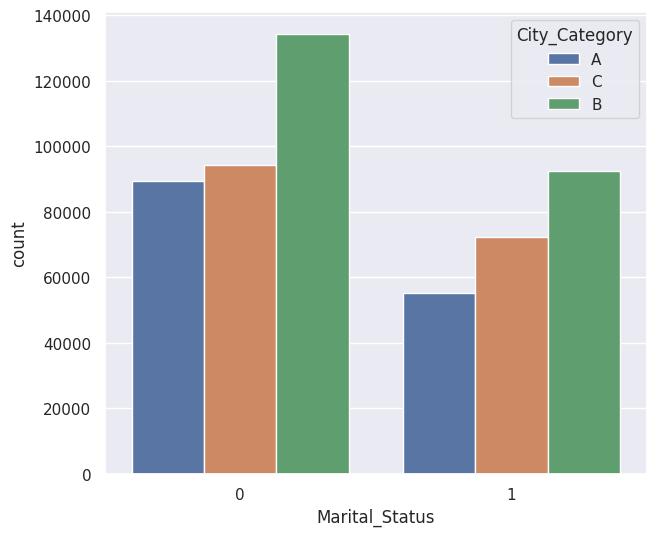

In [168]:
sns.countplot(data=df,x="Marital_Status",hue="City_Category")

<Axes: xlabel='Gender', ylabel='count'>

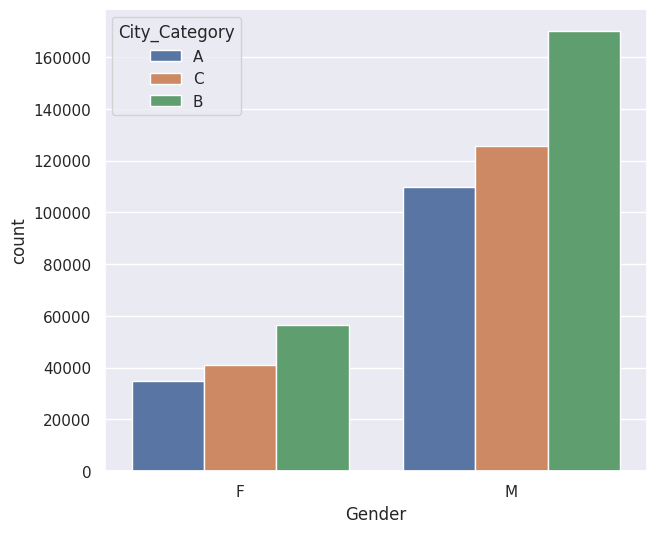

In [169]:
sns.countplot(df,x="Gender",hue="City_Category")

<Axes: ylabel='Purchase'>

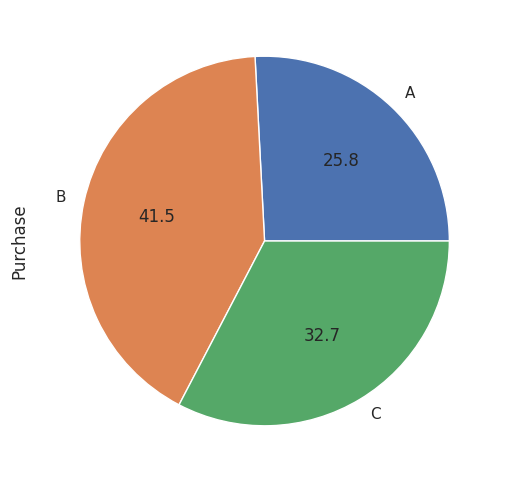

In [170]:
df.groupby(by="City_Category").sum(numeric_only=True)["Purchase"].plot(kind="pie",autopct="%.1f")

<Axes: ylabel='Purchase'>

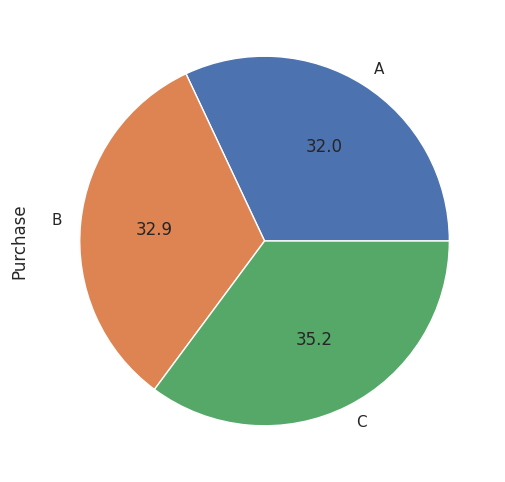

In [171]:
df.groupby(by="City_Category").mean(numeric_only=True)["Purchase"].plot(kind="pie",autopct="%.1f")

In [172]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

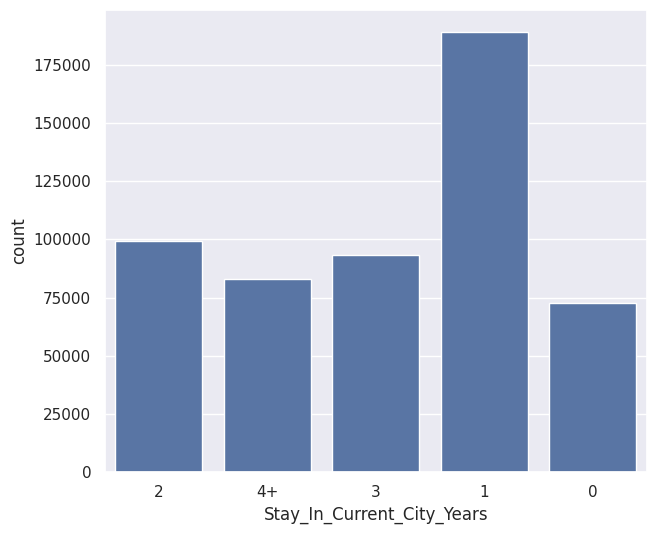

In [173]:
sns.countplot(df,x="Stay_In_Current_City_Years")

<Axes: >

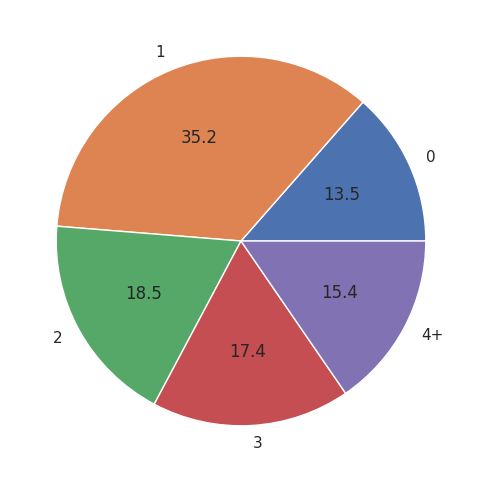

In [174]:
df.groupby(by="Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

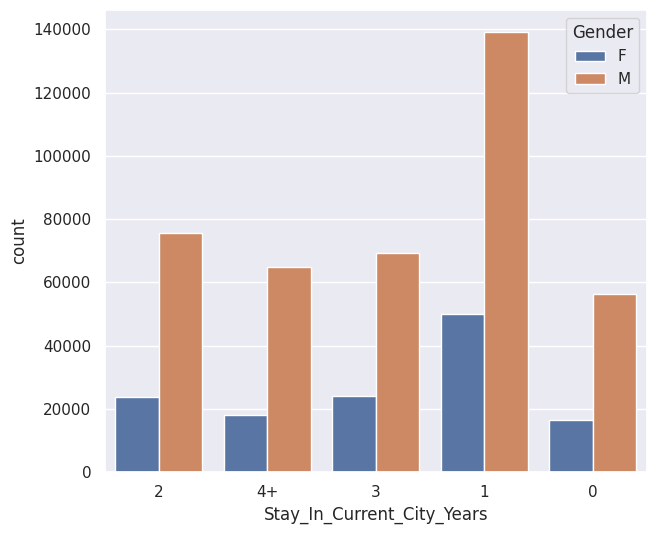

In [175]:
sns.countplot(df,x="Stay_In_Current_City_Years",hue="Gender")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

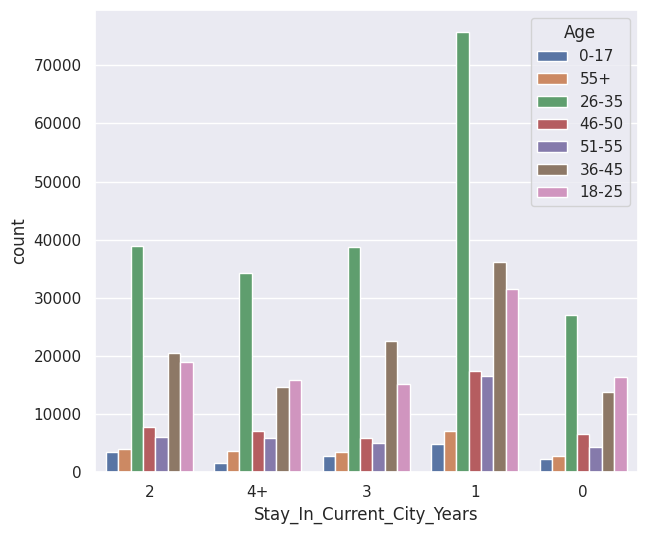

In [176]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Age",data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

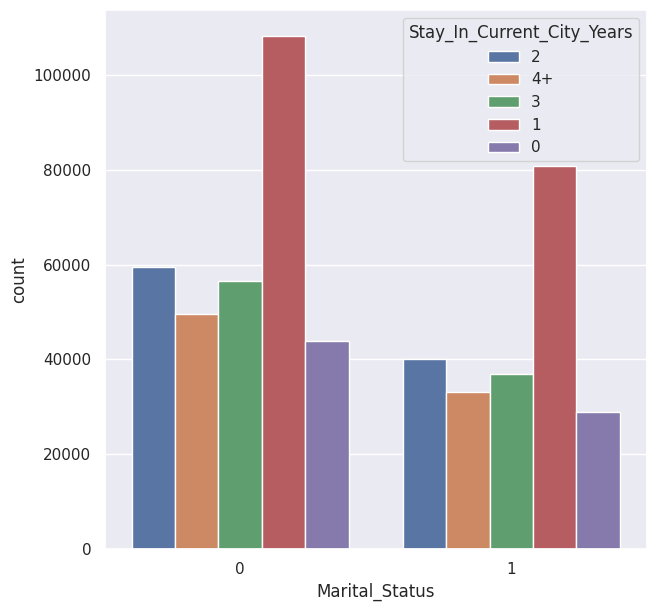

In [177]:
sns.set({"figure.figsize":(7,7)})

sns.countplot(df,hue="Stay_In_Current_City_Years",x="Marital_Status")

<Axes: xlabel='City_Category', ylabel='count'>

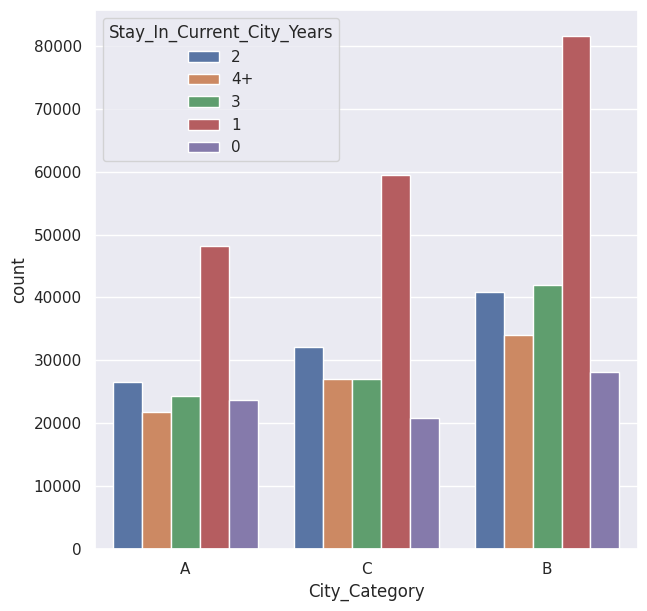

In [178]:
sns.set({"figure.figsize":(7,7)})
sns.countplot(df,hue="Stay_In_Current_City_Years",x="City_Category")

<Axes: xlabel='Stay_In_Current_City_Years'>

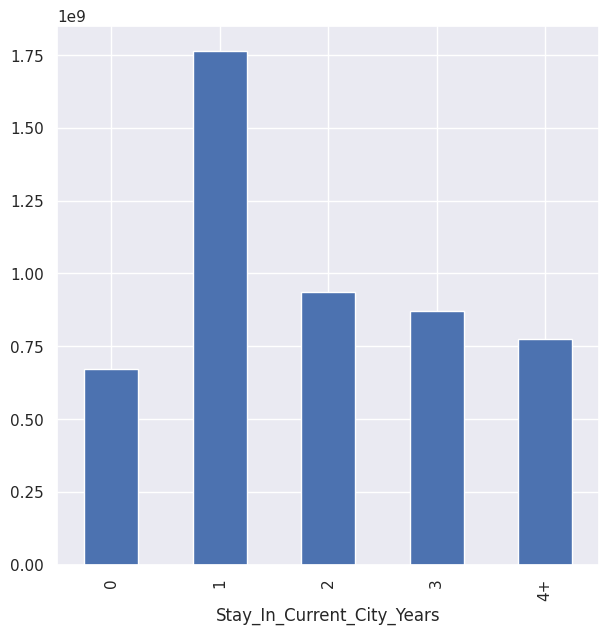

In [179]:
df.groupby(by="Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar")

<Axes: xlabel='Stay_In_Current_City_Years'>

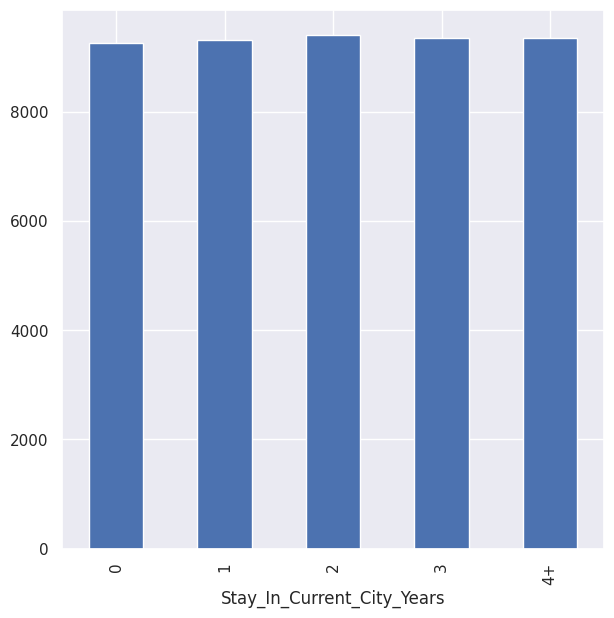

In [180]:
df.groupby(by="Stay_In_Current_City_Years").mean(numeric_only=True)["Purchase"].plot(kind="bar")

OCCUPATION ANALYSIS

<Axes: xlabel='Occupation', ylabel='count'>

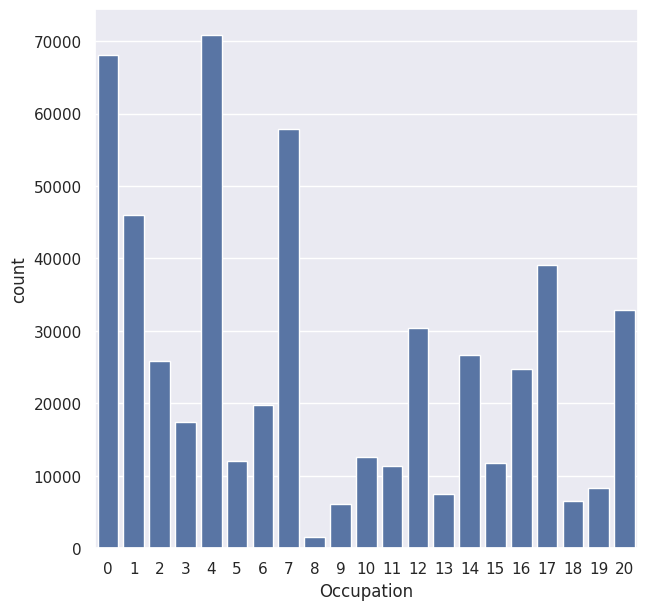

In [181]:
sns.countplot(x=df["Occupation"])

<Axes: xlabel='Occupation'>

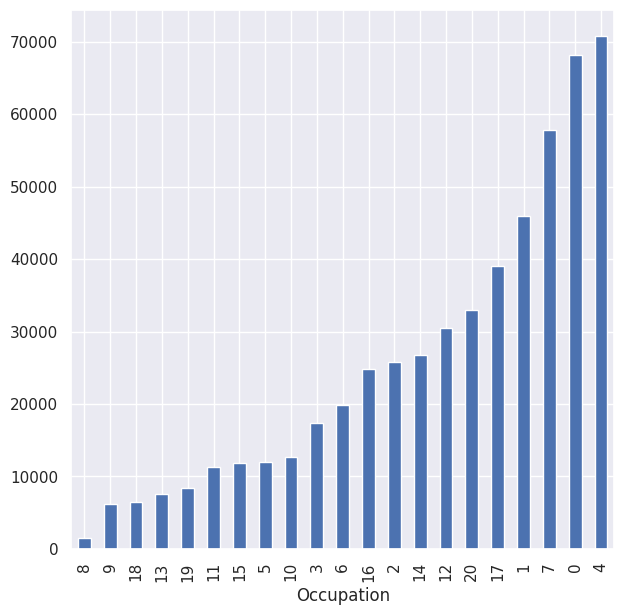

In [182]:
df.groupby(by="Occupation").size().sort_values().plot(kind="bar")

<Axes: xlabel='Occupation'>

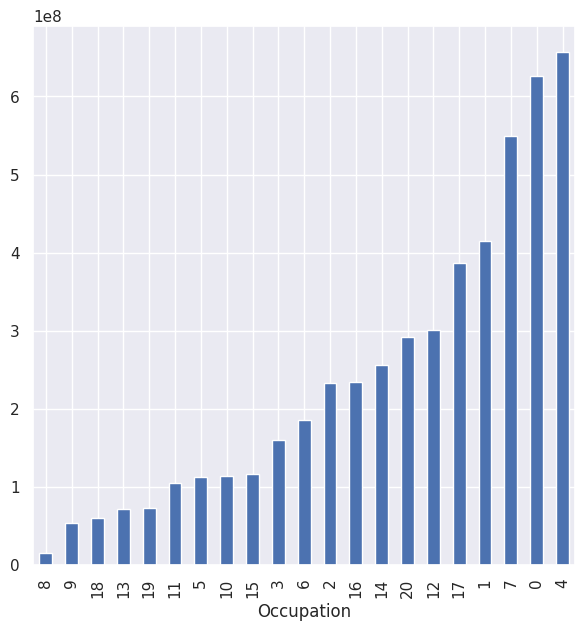

In [183]:
df.groupby(by="Occupation").sum()["Purchase"].sort_values().plot(kind="bar")

<Axes: xlabel='Occupation', ylabel='count'>

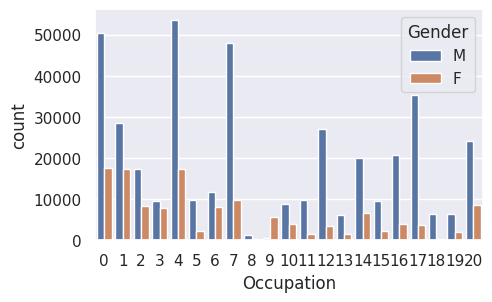

In [185]:
sns.set({"figure.figsize":(5,3)})
sns.countplot(df,x="Occupation",hue="Gender")


<Axes: xlabel='Occupation', ylabel='count'>

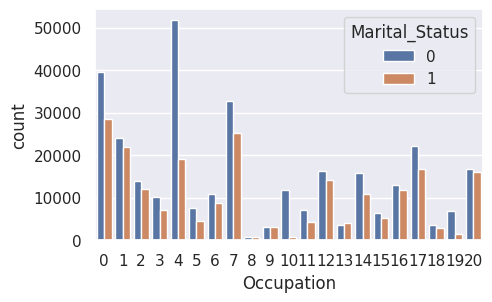

In [186]:
sns.countplot(df,x="Occupation",hue="Marital_Status")

In [187]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Occupation'>

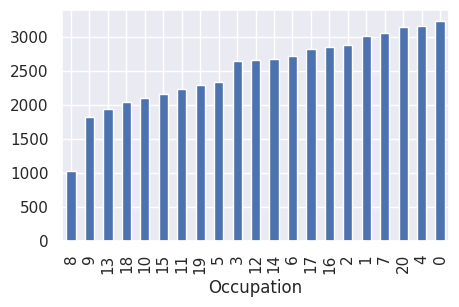

In [188]:
df.groupby(by="Occupation").nunique()["Product_ID"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

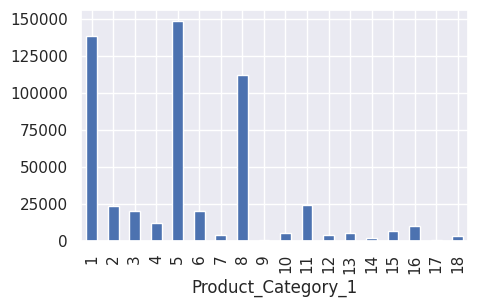

In [189]:
df.groupby(by="Product_Category_1").size().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

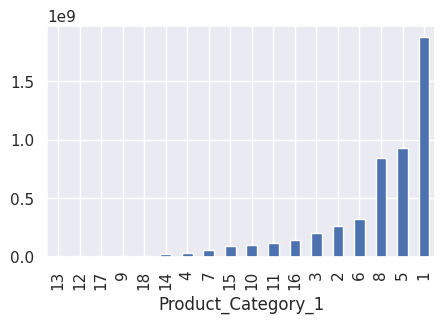

In [190]:
df.groupby(by="Product_Category_1").sum()["Purchase"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

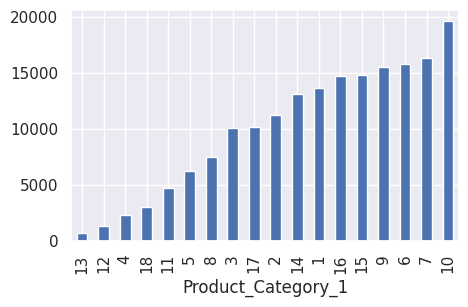

In [191]:
df.groupby(by="Product_Category_1").mean(numeric_only=True)["Purchase"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

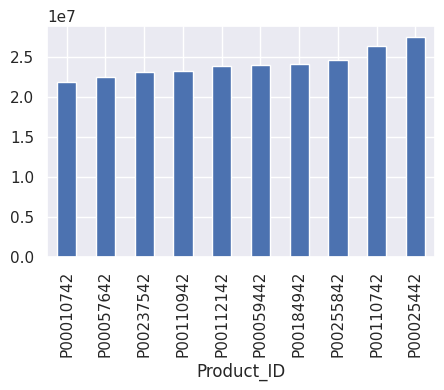

In [192]:
df.groupby(by="Product_ID").sum()["Purchase"].nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

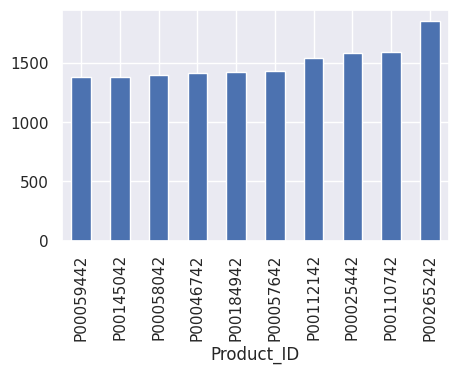

In [193]:
df.groupby(by="Product_ID").size().nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

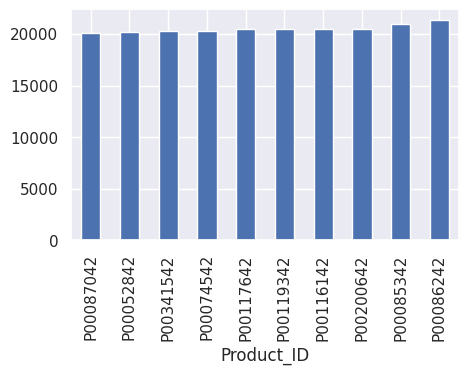

In [194]:
df.groupby(by="Product_ID").mean(numeric_only=True)["Purchase"].nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1', ylabel='count'>

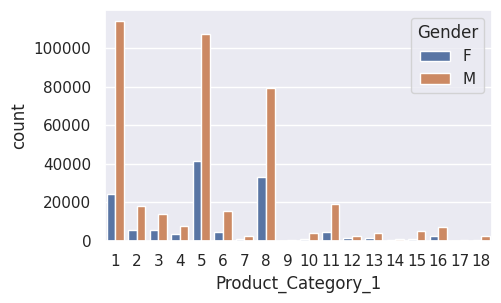

In [195]:
sns.countplot(df,x="Product_Category_1",hue="Gender")

<Axes: xlabel='Product_Category_1', ylabel='count'>

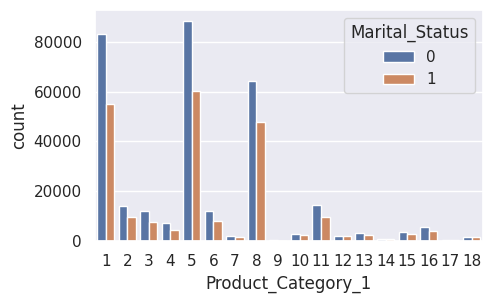

In [196]:

sns.countplot(data=df,x="Product_Category_1",hue="Marital_Status",)

In [197]:
li=[]
for i in range(len(df)):
    li.append(str(df["Gender"][i])+"_"+str(df["Marital_Status"][i]))


In [198]:
df["Marital_Gender"]=li

In [199]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

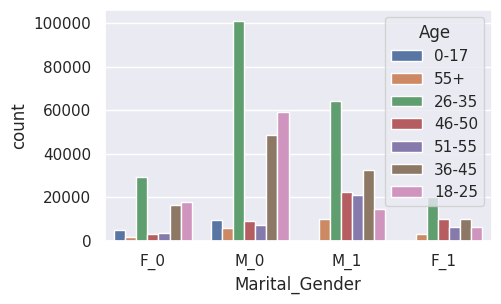

In [200]:
sns.countplot(df,x="Marital_Gender",hue="Age")

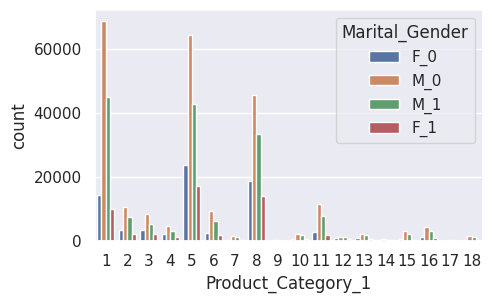

In [201]:
sns.countplot(df,x="Product_Category_1",hue="Marital_Gender")
sns.set({"figure.figsize":(5,5)})

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

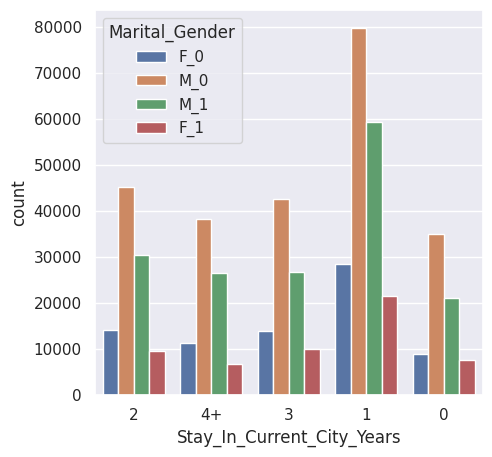

In [202]:
sns.countplot(df,x="Stay_In_Current_City_Years",hue="Marital_Gender")


<Axes: xlabel='City_Category', ylabel='count'>

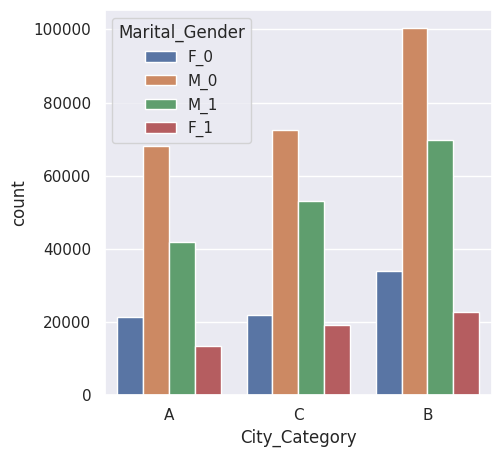

In [203]:
sns.countplot(df,x="City_Category",hue="Marital_Gender")
